In [22]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [15]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [16]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = (BATCH_SIZE)
)

Found 215 files belonging to 3 classes.


In [26]:
class_names = dataset.class_names

In [18]:
len(dataset)

7

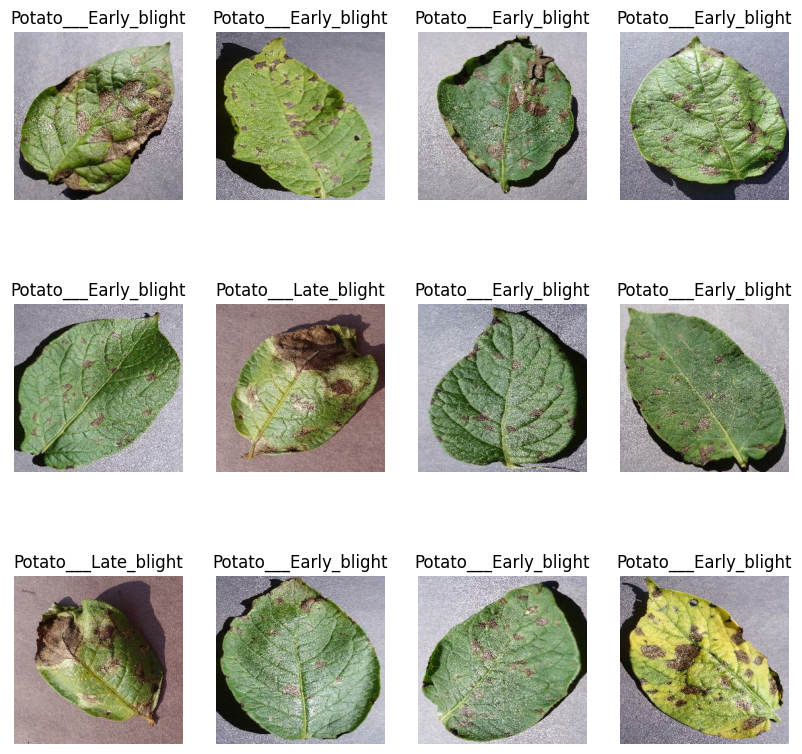

In [30]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [31]:
len(dataset)

7

In [ ]:
# 80% ==> training
# 20% ==> 10% validation, 10% test

In [33]:
train_size = 0.8
len(dataset)*train_size

5.6000000000000005

In [34]:
train_ds = dataset.take(5)
len(train_ds)

5